# Graph Results

This notebook contains visualization and graphing for the harvested speech recognition data.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

## Isolation Tests
Each individual sentence or phrase was said by one robot while the other tried to recognize selected words.

In [37]:
list_dfs = [] # list of dataframes
list_csv_iso = !ls sentence*.csv
list_csv_iso

['sentence10.csv',
 'sentence11.csv',
 'sentence12.csv',
 'sentence13.csv',
 'sentence14.csv',
 'sentence1.csv',
 'sentence2.csv',
 'sentence3.csv',
 'sentence4.csv',
 'sentence5.csv',
 'sentence6.csv',
 'sentence7.csv',
 'sentence8.csv',
 'sentence9.csv']

In [38]:
list_csv_iso = []
for i in range(1,15):
    list_csv_iso.append('sentence%s.csv' % i)
list_csv_iso

['sentence1.csv',
 'sentence2.csv',
 'sentence3.csv',
 'sentence4.csv',
 'sentence5.csv',
 'sentence6.csv',
 'sentence7.csv',
 'sentence8.csv',
 'sentence9.csv',
 'sentence10.csv',
 'sentence11.csv',
 'sentence12.csv',
 'sentence13.csv',
 'sentence14.csv']

In [39]:
for csv in list_csv_iso:
    temp_df = pd.read_csv(csv)
    list_dfs.append(temp_df)
list_dfs

[    Unnamed: 0            confidence    word
 0            0  <...> ignoring <...>  0.5220
 1            1  <...> ignoring <...>  0.5090
 2            2  <...> ignoring <...>  0.4955
 3            3  <...> ignoring <...>  0.5075
 4            4        <...> me <...>  0.5032
 5            5  <...> ignoring <...>  0.5119
 6            6  <...> ignoring <...>  0.5085
 7            7        <...> me <...>  0.4724
 8            8  <...> ignoring <...>  0.5152
 9            9        <...> me <...>  0.5061
 10          10  <...> ignoring <...>  0.4994
 11          11  <...> ignoring <...>  0.5061
 12          12  <...> ignoring <...>  0.5022
 13          13  <...> ignoring <...>  0.5191
 14          14  <...> ignoring <...>  0.5037
 15          15  <...> ignoring <...>  0.5080
 16          16  <...> ignoring <...>  0.4907
 17          17        <...> me <...>  0.5027
 18          18        <...> me <...>  0.4989
 19          19  <...> ignoring <...>  0.5022,
     Unnamed: 0         confidenc

In [40]:
for df in list_dfs:
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df.columns = ['word','confidence'] # mismatched order when writing to csv before
    df['confidence'].replace(to_replace=-3.0, value=0.5, inplace=True)

In [41]:
#list_dfs[0].columns = ['word','column']
list_dfs

[                    word  confidence
 0   <...> ignoring <...>      0.5220
 1   <...> ignoring <...>      0.5090
 2   <...> ignoring <...>      0.4955
 3   <...> ignoring <...>      0.5075
 4         <...> me <...>      0.5032
 5   <...> ignoring <...>      0.5119
 6   <...> ignoring <...>      0.5085
 7         <...> me <...>      0.4724
 8   <...> ignoring <...>      0.5152
 9         <...> me <...>      0.5061
 10  <...> ignoring <...>      0.4994
 11  <...> ignoring <...>      0.5061
 12  <...> ignoring <...>      0.5022
 13  <...> ignoring <...>      0.5191
 14  <...> ignoring <...>      0.5037
 15  <...> ignoring <...>      0.5080
 16  <...> ignoring <...>      0.4907
 17        <...> me <...>      0.5027
 18        <...> me <...>      0.4989
 19  <...> ignoring <...>      0.5022,
                  word  confidence
 0   <...> cream <...>      0.5066
 1   <...> cream <...>      0.5220
 2     <...> ice <...>      0.5051
 3   <...> cream <...>      0.5224
 4   <...> cream <...>    

In [42]:
list_dfs[0]['word'].str.strip('<...>')

0      ignoring 
1      ignoring 
2      ignoring 
3      ignoring 
4            me 
5      ignoring 
6      ignoring 
7            me 
8      ignoring 
9            me 
10     ignoring 
11     ignoring 
12     ignoring 
13     ignoring 
14     ignoring 
15     ignoring 
16     ignoring 
17           me 
18           me 
19     ignoring 
Name: word, dtype: object

In [43]:
for df in list_dfs:
    df['word'] = df['word'].str.strip('<...> ')
    df.fillna('NaN', inplace=True)

In [44]:
list_dfs

[        word  confidence
 0   ignoring      0.5220
 1   ignoring      0.5090
 2   ignoring      0.4955
 3   ignoring      0.5075
 4         me      0.5032
 5   ignoring      0.5119
 6   ignoring      0.5085
 7         me      0.4724
 8   ignoring      0.5152
 9         me      0.5061
 10  ignoring      0.4994
 11  ignoring      0.5061
 12  ignoring      0.5022
 13  ignoring      0.5191
 14  ignoring      0.5037
 15  ignoring      0.5080
 16  ignoring      0.4907
 17        me      0.5027
 18        me      0.4989
 19  ignoring      0.5022,
      word  confidence
 0   cream      0.5066
 1   cream      0.5220
 2     ice      0.5051
 3   cream      0.5224
 4   cream      0.5128
 5   cream      0.5191
 6   cream      0.5143
 7   cream      0.5253
 8   cream      0.5215
 9   cream      0.5104
 10  cream      0.5253
 11  cream      0.5157
 12  cream      0.5224
 13  cream      0.5147
 14  cream      0.5229
 15    ice      0.5071
 16  cream      0.5210
 17  cream      0.5095
 18  cream      

In [45]:
len(list_dfs)

14

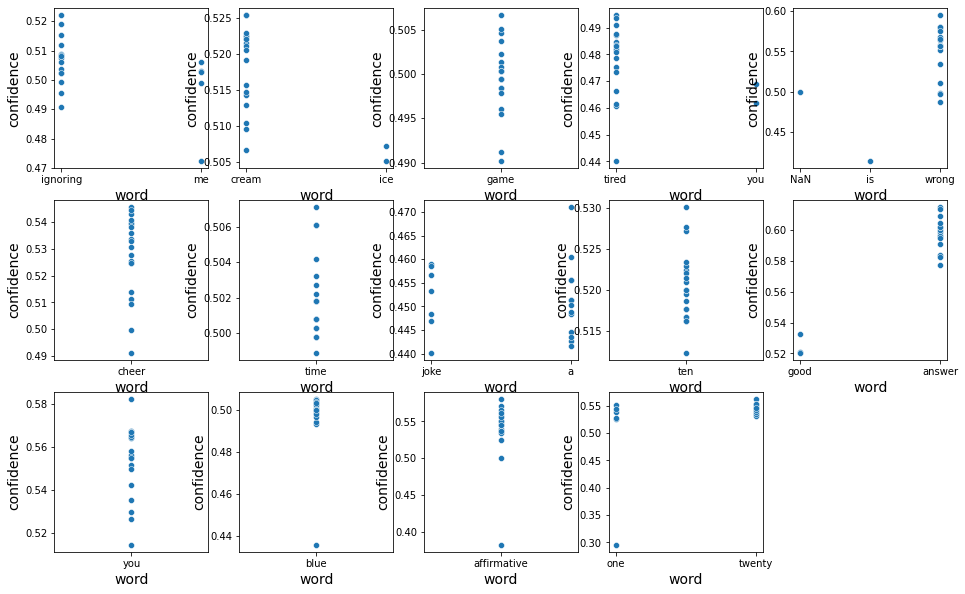

In [46]:
fig = plt.figure(figsize=(16,10))
nx = 3
ny = 5

for i,df in enumerate(list_dfs):
    ax = fig.add_subplot(nx, ny, i+1)
    #ax.set_xticks([0.3,0.6])
    sns.scatterplot(x='word', y='confidence', data=df, ax=ax)

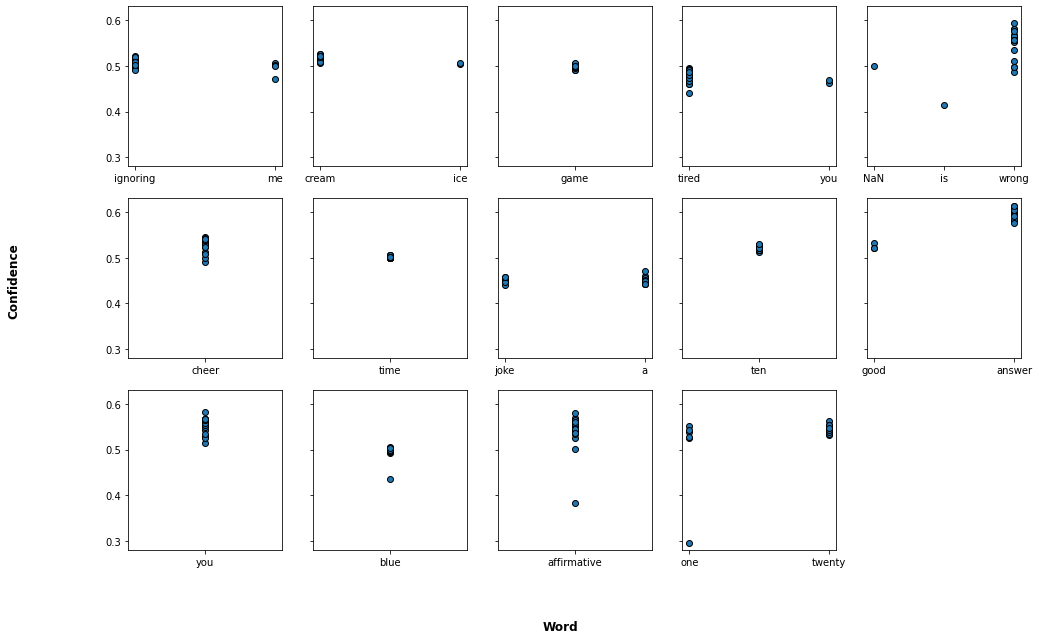

In [47]:
#fig = plt.figure(figsize=(16,10))
#nx = 3
#ny = 5

nrows=3
ncols=5

n = 0

fig, ax = plt.subplots(nrows,ncols,figsize=(16,10),sharey=True)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
#plt.rcParams.update({'font.size': 14})
fig.supxlabel('Word', fontweight='bold')
fig.supylabel('Confidence', fontweight='bold')
fig.delaxes(ax[nrows-1][ncols-1]) # delete extra plot

for i in range(nrows):
    for j in range(ncols):
        if n >= len(list_dfs):
            break
        ax[i][j].scatter(x=list_dfs[n]['word'], y=list_dfs[n]['confidence'], edgecolors='black')
        #sns.scatterplot(x='word', y='confidence', data=list_dfs[n], ax=ax[i][j])
        n+=1

## Full Vocabulary List
The entire vocabulary list is tested against each phrase.

In [82]:
full_vocab = ['ignoring', 'me', 'ice', 'cream', 'a', 'game','you',
              'tired', 'is', 'wrong', 'cheer', 'up', 'with', 'time',
              'a', 'joke', 'nine', 'ten', 'good', 'answer', 'are',
              'you', 'eyes', 'blue', 'affirmative', 'twenty', 'one', 'NaN']

In [49]:
!ls final*.csv

final1.csv  final2.csv	final3.csv  final4.csv	final5.csv  final.csv


In [50]:
full_csvs = !ls final*.csv
full_dfs = []
for csv in full_csvs:
    full_dfs.append(pd.read_csv(csv))
full_dfs

[    Unnamed: 0               confidence    word
 0            0                      NaN -3.0000
 1            1         <...> time <...>  0.4926
 2            2        <...> wrong <...>  0.5705
 3            3        <...> cheer <...>  0.5364
 4            4         <...> time <...>  0.5022
 5            5        <...> cheer <...>  0.5032
 6            6          <...> ten <...>  0.5662
 7            7       <...> answer <...>  0.5960
 8            8          <...> you <...>  0.5575
 9            9          <...> you <...>  0.5143
 10          10  <...> affirmative <...>  0.5772
 11          11       <...> twenty <...>  0.5522
 12          12     <...> ignoring <...>  0.5234
 13          13        <...> cream <...>  0.5330
 14          14        <...> cream <...>  0.4955
 15          15         <...> time <...>  0.4984
 16          16        <...> wrong <...>  0.5691
 17          17        <...> cheer <...>  0.5397
 18          18         <...> time <...>  0.4994
 19          19     

In [51]:
for df in full_dfs:
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df.columns = ['word', 'confidence']
    df.fillna('NaN', inplace=True)
    df.replace(to_replace=-3.0, value=0.5, inplace=True)
    df['word'] = df['word'].str.strip('<...> ')
    df['ground_truth'] = df['word']

In [52]:
full_dfs

[           word  confidence ground_truth
 0           NaN      0.5000          NaN
 1          time      0.4926         time
 2         wrong      0.5705        wrong
 3         cheer      0.5364        cheer
 4          time      0.5022         time
 5         cheer      0.5032        cheer
 6           ten      0.5662          ten
 7        answer      0.5960       answer
 8           you      0.5575          you
 9           you      0.5143          you
 10  affirmative      0.5772  affirmative
 11       twenty      0.5522       twenty
 12     ignoring      0.5234     ignoring
 13        cream      0.5330        cream
 14        cream      0.4955        cream
 15         time      0.4984         time
 16        wrong      0.5691        wrong
 17        cheer      0.5397        cheer
 18         time      0.4994         time
 19        cheer      0.5018        cheer
 20          ten      0.5258          ten
 21       answer      0.6436       answer
 22          you      0.5599      

In [53]:
full_dfs[0].loc[0,'ground_truth'] = 'ignoring'
#full_dfs[0].loc[1,'ground_truth'] = 'tired'

start = 6
end = len(full_vocab)
single_word_count = 24
df = full_dfs[0]
i=1

def add_truth(df, count, i):
    while i < len(df.index):
        if count >= end:
            count = 0
            continue
        if count >= single_word_count:
            first_word = not(count % 2)
        else:
            first_word = count % 2
        if count == single_word_count or count == end-1:
            df.loc[i, 'ground_truth'] = full_vocab[count]
            count+=1
            i+=1
        else:
            if first_word:
                df.loc[i, 'ground_truth'] = full_vocab[count]
                count+=1
                i+=1
            else:
                if df.loc[i, 'word'] == full_vocab[count]:
                    df.loc[i, 'ground_truth'] = full_vocab[count]
                    count+=2
                    i+=1
                else:
                    count +=1
add_truth(df,start,i)

In [54]:
df

,word,confidence,ground_truth
0,NaN,0.5000,ignoring
1,time,0.4926,tired
2,wrong,0.5705,wrong
3,cheer,0.5364,cheer
4,time,0.5022,time
5,cheer,0.5032,joke
6,ten,0.5662,ten
7,answer,0.5960,answer
8,you,0.5575,you
9,you,0.5143,blue


In [55]:
df = full_dfs[1]
count = 8
i = 3
df.loc[2, 'ground_truth'] = 'tired'
add_truth(df, count, i)
df

,word,confidence,ground_truth
0,ignoring,0.5229,ignoring
1,cream,0.4984,cream
2,ice,0.4936,tired
3,wrong,0.5734,wrong
4,cheer,0.5417,cheer
5,time,0.5008,time
6,you,0.5018,joke
7,ten,0.5344,ten
8,answer,0.6426,answer
9,you,0.5628,you


In [56]:
df = full_dfs[2]
i=0
count=0
add_truth(df, count, i)
df

,word,confidence,ground_truth
0,ignoring,0.5171,ignoring
1,cream,0.5450,cream
2,game,0.5085,game
3,time,0.4974,tired
4,wrong,0.5926,wrong
5,cheer,0.5402,cheer
6,time,0.5046,time
7,you,0.5022,joke
8,ten,0.5157,ten
9,answer,0.6311,answer


In [57]:
df = full_dfs[3]
df.drop(0, axis=0, inplace=True) # Garbage from memory when restarting experiment

In [58]:
df.head()

,word,confidence,ground_truth
1,ignoring,0.5181,ignoring
2,cream,0.5220,cream
3,you,0.5085,you
4,me,0.4465,me
5,wrong,0.5739,wrong


In [59]:
i = 1
count = 0
add_truth(df, count, i)
df

,word,confidence,ground_truth
1,ignoring,0.5181,ignoring
2,cream,0.5220,cream
3,you,0.5085,game
4,me,0.4465,tired
5,wrong,0.5739,wrong
6,cheer,0.5426,cheer
7,time,0.5013,time
8,you,0.4994,joke
9,ten,0.5287,ten
10,answer,0.6469,answer


In [60]:
df = full_dfs[4]
df.head()

,word,confidence,ground_truth
0,ignoring,0.5311,ignoring
1,cream,0.5287,cream
2,game,0.5104,game
3,eyes,0.5258,eyes
4,wrong,0.5657,wrong


In [61]:
df.loc[5, 'ground_truth'] = 'time'
df.loc[6, 'ground_truth'] = 'joke'
i = 7
count = 16
add_truth(df, count, i)

In [62]:
df = full_dfs[5] # We forgot to add the first sentence for this one
df.head() # Leave out for now

,word,confidence,ground_truth
0,twenty,0.5575,twenty
1,cream,0.5335,cream
2,cream,0.4965,cream
3,is,0.4922,is
4,wrong,0.5700,wrong


### Confusion Matrix

In [63]:
conf_mat_list = full_dfs[0:5]

In [64]:
len(conf_mat_list)

5

In [65]:
df = pd.concat(conf_mat_list)
df.reset_index(drop=True, inplace=True)

In [66]:
df

,word,confidence,ground_truth
0,NaN,0.5000,ignoring
1,time,0.4926,tired
2,wrong,0.5705,wrong
3,cheer,0.5364,cheer
4,time,0.5022,time
...,...,...,...
244,wrong,0.5931,wrong
245,cheer,0.5441,cheer
246,time,0.4979,time
247,you,0.5056,joke


In [81]:
df[df['confidence'] > 0.4]

,word,confidence,ground_truth
0,NaN,0.5000,ignoring
1,time,0.4926,tired
2,wrong,0.5705,wrong
3,cheer,0.5364,cheer
4,time,0.5022,time
...,...,...,...
244,wrong,0.5931,wrong
245,cheer,0.5441,cheer
246,time,0.4979,time
247,you,0.5056,joke


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [83]:
conf_matrix = confusion_matrix(df['ground_truth'], df['word'], labels=full_vocab)
print(conf_matrix)
#df['ground_truth']

[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  2  0  9  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  6  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  1  3  0  0  0  0  0  0  1  2  0  0 11  0  0  0  0  0  0  0  0  1  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  

In [84]:
acc = accuracy_score(df['ground_truth'], df['word'])
print(acc)

0.7469879518072289


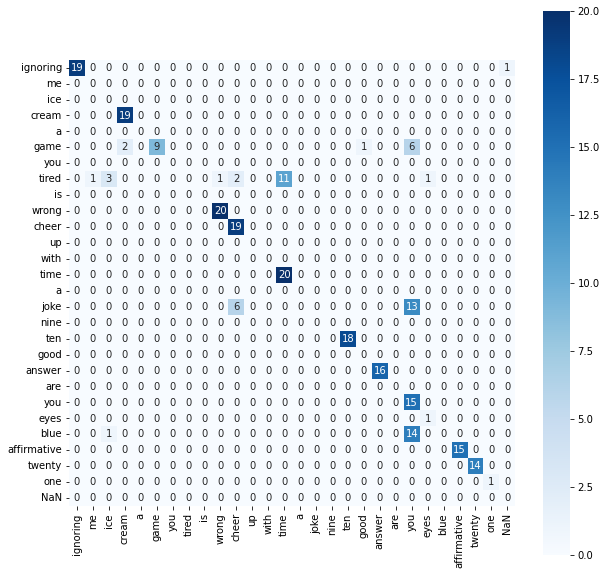

In [85]:
labels = full_vocab
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, square=True, cmap='Blues')
#sns.heatmap?
plt.show()

## Test Runs
The results for each robot were tracked during a few test runs.

In [72]:
ls *.csv

final1.csv  mainResultsA1.csv  sentence10.csv  sentence2.csv  sentence8.csv
final2.csv  mainResultsA2.csv  sentence11.csv  sentence3.csv  sentence9.csv
final3.csv  mainResultsA3.csv  sentence12.csv  sentence4.csv
final4.csv  mainResultsA.csv   sentence13.csv  sentence5.csv
final5.csv  mainResultsB1.csv  sentence14.csv  sentence6.csv
final.csv   mainResultsB.csv   sentence1.csv   sentence7.csv


In [73]:
df_A = pd.read_csv('mainResultsA.csv')
df_A

,Unnamed: 0,confidence,mood,word
0,0,-3.0000,-100,NaN
1,1,0.4960,-80,<...> me <...>
2,2,0.5032,-60,<...> cream <...>
3,3,0.4883,-40,<...> game <...>
4,4,0.4652,-20,<...> tired <...>
5,5,0.5143,0,<...> wrong <...>
6,6,0.5210,20,<...> cheer <...>
7,7,0.4897,40,<...> time <...>
8,8,0.4662,60,<...> joke <...>
9,9,0.5133,80,<...> ten <...>


In [74]:
df_B = pd.read_csv('mainResultsB.csv')
df_B

,Unnamed: 0,confidence,word
0,0,-3.0000,NaN
1,1,-3.0000,NaN
2,2,0.5258,<...> you <...>
3,3,0.4998,<...> blue <...>
4,4,0.5421,<...> affirmative <...>
5,5,0.5239,<...> twenty <...>


In [75]:
df_A.drop('Unnamed: 0', axis=1, inplace=True)
df_B.drop('Unnamed: 0', axis=1, inplace=True)

df_A.replace(to_replace=-3.0, value=0.5, inplace=True)
df_B.replace(to_replace=-3.0, value=0.5, inplace=True)

<ipython-input-76-138bf9af9c8b>:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([plotB, plotA_1, plotA_2], labels=['Robot B', 'Robot A'])


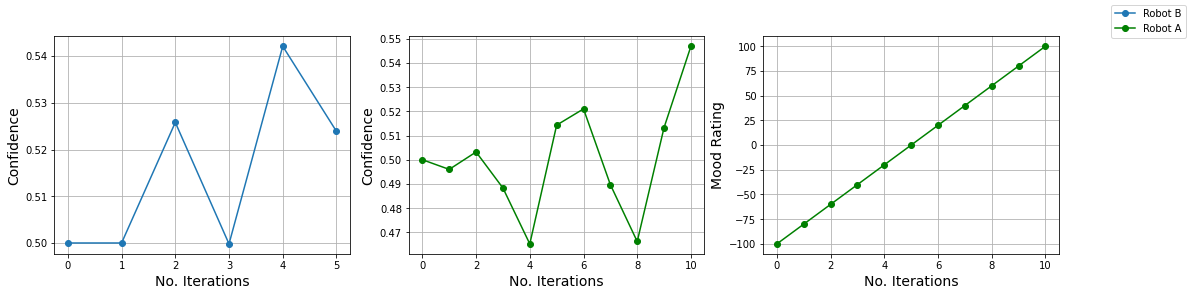

In [76]:
fig, ax = plt.subplots(1,3, figsize=(18,4))
x = df_B.index
y = df_B['confidence']
#theta = np.polyfit(x, y, 1)
#y_bf = theta[0]*x + theta[1]
#ax[0].scatter(x, y)
plotB = ax[0].plot(x, y, marker='o')
plotA_1 = ax[1].plot(df_A.index, df_A['confidence'], marker='o', color='green')
plotA_2 = ax[2].plot(df_A.index, df_A['mood'], marker='o', color='green')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_xlabel('No. Iterations')
ax[1].set_xlabel('No. Iterations')
ax[2].set_xlabel('No. Iterations')

ax[0].set_ylabel('Confidence')
ax[1].set_ylabel('Confidence')
ax[2].set_ylabel('Mood Rating')

fig.legend([plotB, plotA_1, plotA_2], labels=['Robot B', 'Robot A'])

plt.show()

### Results with Branching/Repetitions
If either NAO robot does not understand, then it will repeat what it said.

In [77]:
df_A1 = pd.read_csv('mainResultsA1.csv')
df_A1

,Unnamed: 0,confidence,mood,word
0,0,-3.0000,-100,NaN
1,1,-3.0000,-100,NaN
2,2,0.4888,-80,<...> me <...>
3,3,0.5037,-60,<...> cream <...>
4,4,0.4551,-40,<...> game <...>
5,5,0.4758,-20,<...> you <...>
6,6,0.4777,0,<...> is <...>
7,7,-3.0000,0,NaN
8,8,0.4998,20,<...> up <...>
9,9,-3.0000,20,NaN


In [78]:
df_B1 = pd.read_csv('mainResultsB1.csv')
df_B1

,Unnamed: 0,confidence,word
0,0,-3.0000,NaN
1,1,0.4994,<...> you <...>
2,2,0.4878,<...> blue <...>
3,3,0.5287,<...> affirmative <...>
4,4,0.5344,<...> twenty <...>


In [79]:
df_A1.drop('Unnamed: 0', axis=1, inplace=True)
df_B1.drop('Unnamed: 0', axis=1, inplace=True)

df_A1.replace(to_replace=-3.0, value=0.5, inplace=True)
df_B1.replace(to_replace=-3.0, value=0.5, inplace=True)

<ipython-input-80-39126b85efd1>:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([plotB1, plotA1_1, plotA1_2], labels=['Robot B', 'Robot A'])


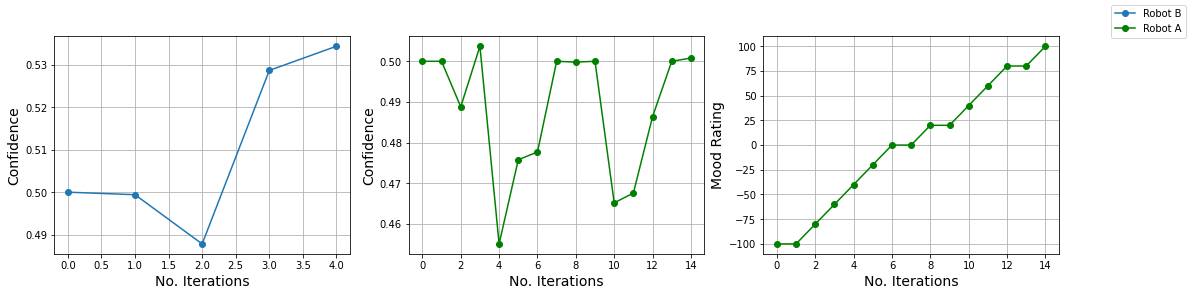

In [80]:
fig, ax = plt.subplots(1,3, figsize=(18,4))
x = df_B1.index
y = df_B1['confidence']
#theta = np.polyfit(x, y, 1)
#y_bf = theta[0]*x + theta[1]
#ax[0].scatter(x, y)
plotB1 = ax[0].plot(x, y, marker='o')
plotA1_1 = ax[1].plot(df_A1.index, df_A1['confidence'], marker='o', color='green')
plotA1_2 = ax[2].plot(df_A1.index, df_A1['mood'], marker='o', color='green')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_xlabel('No. Iterations')
ax[1].set_xlabel('No. Iterations')
ax[2].set_xlabel('No. Iterations')

ax[0].set_ylabel('Confidence')
ax[1].set_ylabel('Confidence')
ax[2].set_ylabel('Mood Rating')

fig.legend([plotB1, plotA1_1, plotA1_2], labels=['Robot B', 'Robot A'])

plt.show()